# Introduction

### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 200

### Load cleaned data

In [3]:
ufc_df = pd.read_feather('data/ufc_df.feather')
fighters = pd.read_feather('data/fighters_clean.feather')
fight_stats = pd.read_feather('data/fight_stats_clean.feather')
fights = pd.read_feather('data/fights_clean.feather')
events = pd.read_feather('data/events_clean.feather')

In [4]:
ufc_df.columns

Index(['fight_id', 'fighter_id', 'knockdowns', 'total_strikes_att',
       'total_strikes_succ', 'sig_strikes_att', 'sig_strikes_succ',
       'takedown_att', 'takedown_succ', 'submission_att', 'reversals',
       'ctrl_time_sec', 'total_strike_acc_pct', 'sig_strike_acc_pct',
       'takedown_acc_pct', 'fighter_height_cm', 'fighter_reach_cm',
       'fighter_dob', 'num_rounds', 'title_fight', 'weight_class',
       'weight_class_lbs', 'weight_category', 'gender', 'result',
       'fight_duration_sec', 'fighter_height_cm_opp', 'fighter_reach_cm_opp',
       'fighter_dob_opp', 'fight_date', 'reach_adv_cm', 'height_adv_cm', 'win',
       'fighter_age', 'fighter_age_opp', 'age_diff'],
      dtype='object')

## Age

The average age of a fighter is 30 years old, with no significant differences across gender. The difference in distribution can be attributed to the lower sample size of female fights. This makes the average UFC athlete significantly older compared to some other sports. The average age in the NBA, NFL, NRL and AFL are in the ranges of 25-26. Some speculations include the number of competitions an athlete endures a year, training methods and etc.

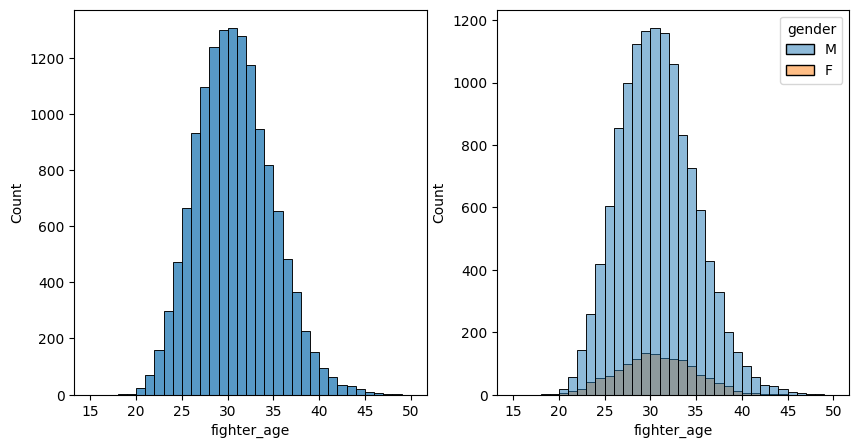

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.histplot(ufc_df,
             x='fighter_age',
             bins=np.arange(15,51,1),
             ax=axes[0])


sns.histplot(ufc_df,
             x='fighter_age',
             hue='gender',
             bins=np.arange(15,51,1),
             ax=axes[1]);

<Axes: xlabel='age_diff', ylabel='Count'>

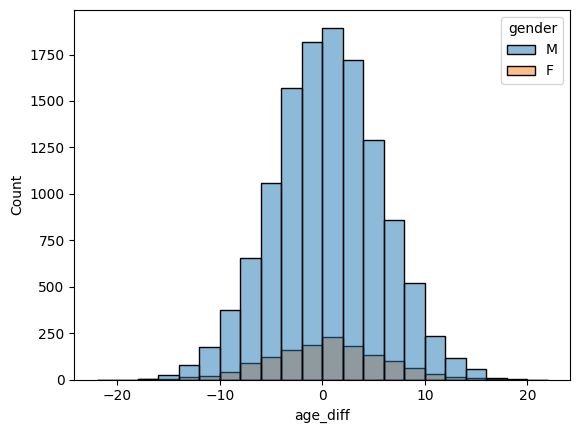

In [6]:
fig, ax = plt.subplots()

sns.histplot(ufc_df,
             x='age_diff',
             hue='gender',
             bins=np.arange(-22,24,2))

## Does a fighter's age correlate with fight outcome (win/loss)?

Grouping the age difference (where a positive age difference means that the fighter is older than their opponent) into quartiles reveals that there is a correlation between age difference and fight outcome. The chart below shows that as we move up in age quartile the win rate of fighters show a clear decline.

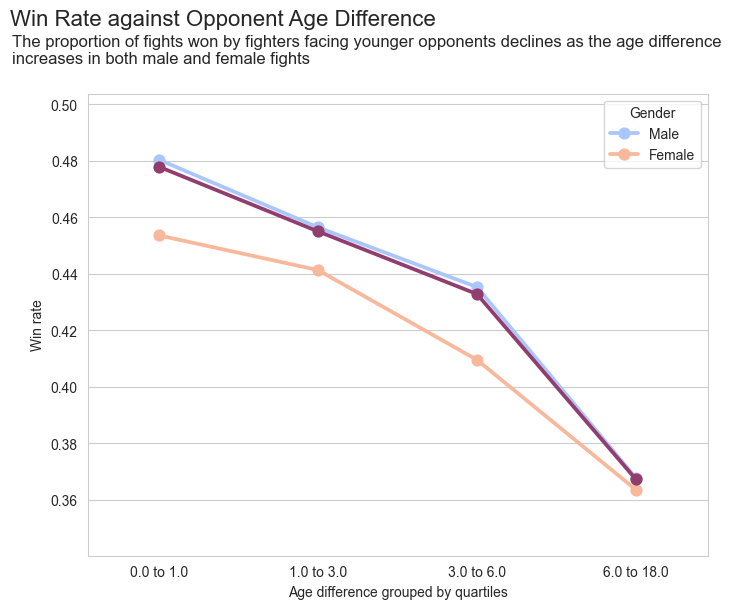

In [25]:
age_diff_df = ufc_df.query("age_diff >= 0").copy()

age_min = age_diff_df["age_diff"].min()
quantile_25 = age_diff_df["age_diff"].quantile(0.25)
age_median = age_diff_df["age_diff"].median()
quantile_75 = age_diff_df["age_diff"].quantile(0.75)
age_max = age_diff_df["age_diff"].max()

age_labels = [
    f"{age_min.round()} to {quantile_25.round()}",
    f"{quantile_25.round()} to {age_median.round()}",
    f"{age_median.round()} to {quantile_75.round()}",
    f"{quantile_75.round()} to {age_max.round()}",
]

age_ranges = [age_min, quantile_25, age_median, quantile_75, age_max]

age_diff_df["age_diff_quart"] = pd.cut(
    age_diff_df["age_diff"], bins=age_ranges, labels=age_labels
)

# Plot
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,6))

sns.pointplot(
    age_diff_df,
    x="age_diff_quart",
    y="win",
    hue="gender",
    palette="coolwarm",
    errorbar=None,
    ax=ax,
)

sns.pointplot(
    age_diff_df,
    x="age_diff_quart",
    y="win",
    color="#913D6D",
    errorbar=None,
    label="Both",
    ax=ax,
)

plt.title(
    "Win Rate against Opponent Age Difference", x=-0.125, y=1.13, ha="left", fontsize=16
)
plt.suptitle(
    "The proportion of fights won by fighters facing younger opponents declines as the age difference increases in both male and female fights",
    y=0.98,
    x=0.03,
    ha="left",
    wrap=True,
)
ax.set(xlabel="Age difference grouped by quartiles", ylabel="Win rate")
ax.legend(["Male", "Female"], title="Gender")
plt.margins(x=0.15, y=0.2);

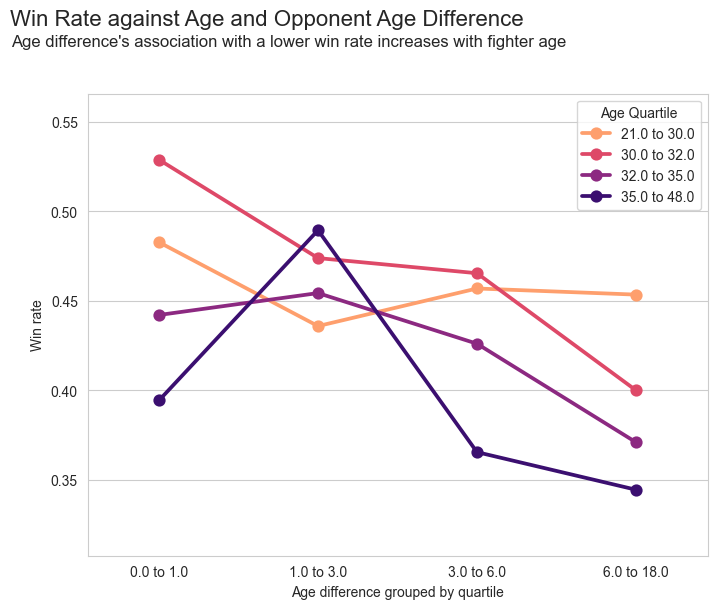

In [8]:
# Group fighter age by quartile
age_min = age_diff_df["fighter_age"].min()
quantile_25 = age_diff_df["fighter_age"].quantile(0.25)
age_median = age_diff_df["fighter_age"].median()
quantile_75 = age_diff_df["fighter_age"].quantile(0.75)
age_max = age_diff_df["fighter_age"].max()

age_labels = [
    f"{age_min.round()} to {quantile_25.round()}",
    f"{quantile_25.round()} to {age_median.round()}",
    f"{age_median.round()} to {quantile_75.round()}",
    f"{quantile_75.round()} to {age_max.round()}",
]

age_ranges = [age_min, quantile_25, age_median, quantile_75, age_max]

age_diff_df["fighter_age_quart"] = pd.cut(
    age_diff_df["fighter_age"], bins=age_ranges, labels=age_labels
)

fig, ax = plt.subplots(figsize=(8, 6))

sns.pointplot(
    age_diff_df,
    x="age_diff_quart",
    y="win",
    hue="fighter_age_quart",
    palette="magma_r",
    errorbar=None,
)

# Customise plot
ax.set(xlabel="Age difference grouped by quartile", ylabel="Win rate")
ax.legend(title="Age Quartile")
plt.title(
    "Win Rate against Age and Opponent Age Difference",
    x=-0.125,
    y=1.13,
    ha="left",
    fontsize=16,
)
plt.suptitle(
    "Age difference's association with a lower win rate increases with fighter age",
    y=0.98,
    x=0.03,
    ha="left",
    wrap=True,
)
plt.margins(x=0.15, y=0.2)

In [9]:
age_diff_df[['fighter_age', 'age_diff', 'win']].groupby(['fighter_age', 'age_diff']).mean().reset_index()

,fighter_age,age_diff,win
0,21.0,0.0,0.500000
1,21.0,1.0,0.000000
2,22.0,0.0,0.500000
3,22.0,1.0,0.333333
4,23.0,0.0,0.500000
...,...,...,...
278,46.0,13.0,0.000000
279,46.0,14.0,1.000000
280,47.0,2.0,1.000000
281,47.0,5.0,1.000000


## Does a fighter's reach correlate with fight outcome (win/loss)?

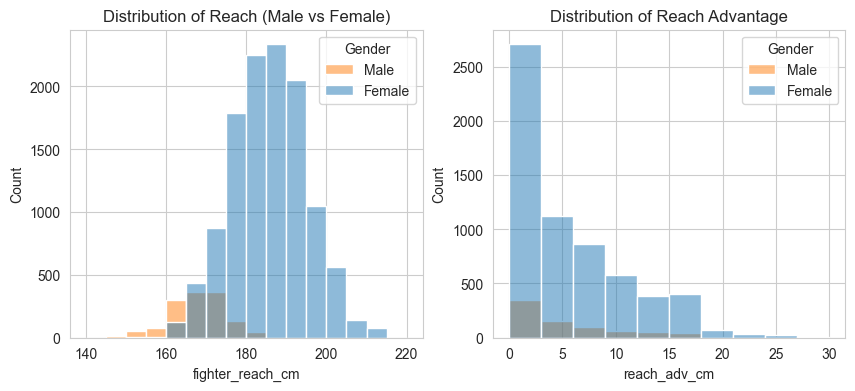

In [35]:
df = fighters.merge(ufc_df[['fighter_id', 'gender']], how='left', on='fighter_id')
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.histplot(df,
             x='fighter_reach_cm',
             hue='gender',
             # palette='RdBu_r',
             bins=np.arange(140, 225, 5),
             ax=axes[0])

axes[0].set_title('Distribution of Reach (Male vs Female)')
axes[0].legend(['Male', 'Female'], title='Gender')

sns.histplot(ufc_df.query('reach_adv_cm >= 0'),
             x='reach_adv_cm',
             hue='gender',
             bins=np.arange(0, 33, 3),
             ax=axes[1])

axes[1].set_title('Distribution of Reach Advantage')
axes[1].legend(['Male', 'Female'], title='Gender')

Interestingly, grouping by gender reveals that reach correlates with wins in the opposite direction. This may be explained by the notion that reach plays a greater role in fight outcomes as weight increases and how female fighters on average weigh less than their male counterparts, which if the earlier statement is accurate, would imply that reach plays less of a role in deciding fight outcomes. Another explanation can be how there are far less datapoints from female fighters.

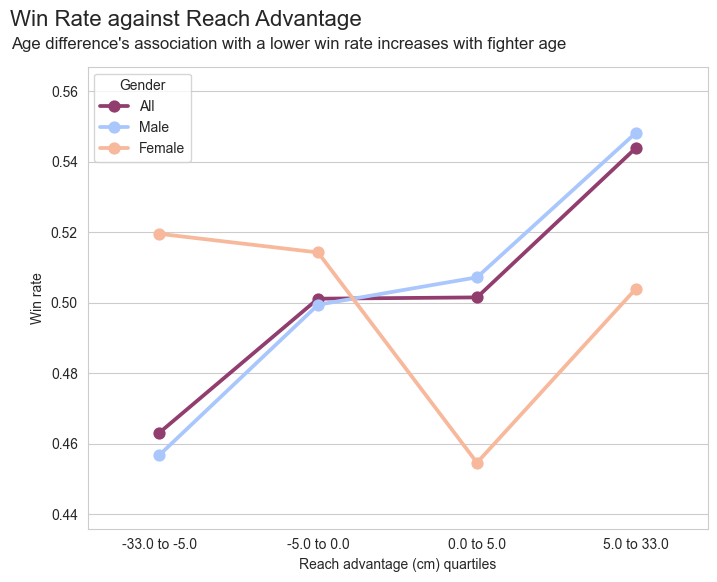

In [40]:
reach_df = ufc_df.copy()

reach_min = reach_df['reach_adv_cm'].min()
quantile_25 = reach_df['reach_adv_cm'].quantile(0.25)
reach_median = reach_df['reach_adv_cm'].median()
quantile_75 = reach_df['reach_adv_cm'].quantile(0.75)
reach_max = reach_df['reach_adv_cm'].max()

reach_labels = [f'{reach_min.round()} to {quantile_25.round()}',
                f'{quantile_25.round()} to {reach_median.round()}',
                f'{reach_median.round()} to {quantile_75.round()}',
                f'{quantile_75.round()} to {reach_max.round()}']

reach_ranges = [reach_min, quantile_25, reach_median, quantile_75, reach_max]

reach_df['reach_adv_quart'] = pd.cut(reach_df['reach_adv_cm'], bins=reach_ranges, labels=reach_labels)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.pointplot(
    reach_df, x="reach_adv_quart", y="win", errorbar=None, color="#913D6D"
)
sns.pointplot(
    reach_df,
    x="reach_adv_quart",
    y="win",
    hue="gender",
    palette='coolwarm',
    errorbar=None,
)

ax.legend(['All', 'Male', 'Female'], title='Gender')

ax.set(xlabel="Reach advantage (cm) quartiles", ylabel="Win rate")
plt.title(
    "Win Rate against Reach Advantage",
    x=-0.125,
    y=1.07,
    ha="left",
    fontsize=16,
)
plt.suptitle(
    "Age difference's association with a lower win rate increases with fighter age",
    y=0.93,
    x=0.03,
    ha="left",
    wrap=True,
)

plt.margins(x=0.15, y=0.2)

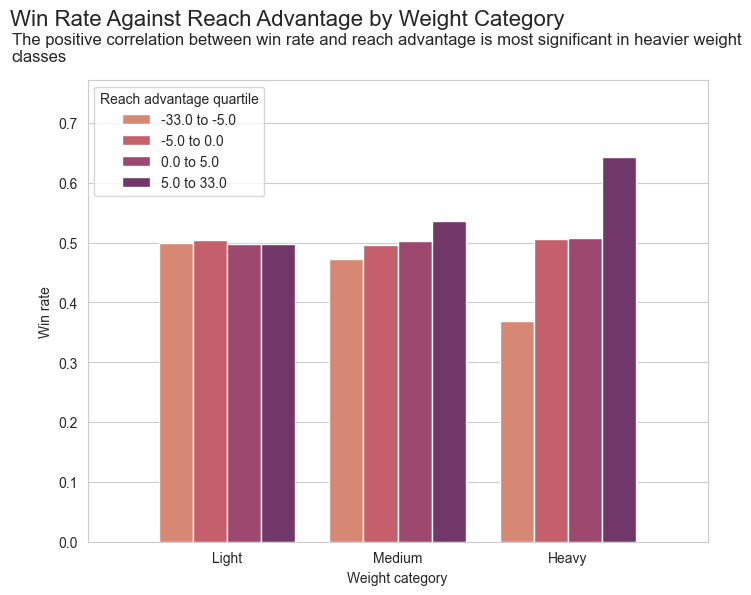

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(
    reach_df.query('weight_category != "Other"').sort_values('weight_class_lbs'),
    x="weight_category",
    y="win",
    hue="reach_adv_quart",
    palette="flare",
    width=0.8,
    # marker='D',
    errorbar=None,

)
# Customise plot
ax.set(xlabel="Weight category", ylabel="Win rate")
ax.legend(title='Reach advantage quartile', loc='upper left')
plt.title(
    "Win Rate Against Reach Advantage by Weight Category",
    x=-0.125,
    y=1.10,
    ha="left",
    fontsize=16,
)
plt.suptitle(
    "The positive correlation between win rate and reach advantage is most significant in heavier weight classes",
    y=0.96,
    x=0.03,
    ha="left",
    wrap=True,
)
plt.margins(x=0.15, y=0.2)

## Fight duration

For both 3-round and 5-round fights, the majority go to decision, lasting 15 and 25 minutes respectively. The density plot below shows that in 5 round fights, title fights and occasionally non-title main event fights, have a larger proportion that end earlier than the maximum fight duration in comparison to 3-round fights. This implies a greater rate of fight finishes by KO/TKO or submission.

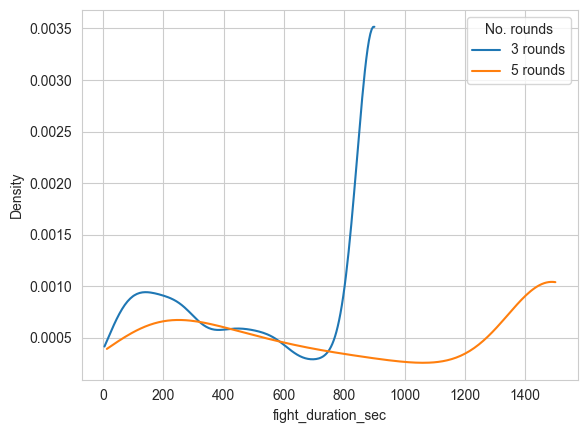

In [14]:
three_rounds = (fights.query('num_rounds == 3')["fight_duration_sec"])
three_rounds_max = fights.query('num_rounds == 3')["fight_duration_sec"].max()
five_rounds = (fights.query('num_rounds == 5')["fight_duration_sec"])

fig, ax = plt.subplots()
sns.kdeplot(three_rounds, label='3 rounds', common_norm=True, cut=0)
sns.kdeplot(five_rounds, label='5 rounds', common_norm=True, cut=0)
ax.legend(title='No. rounds')

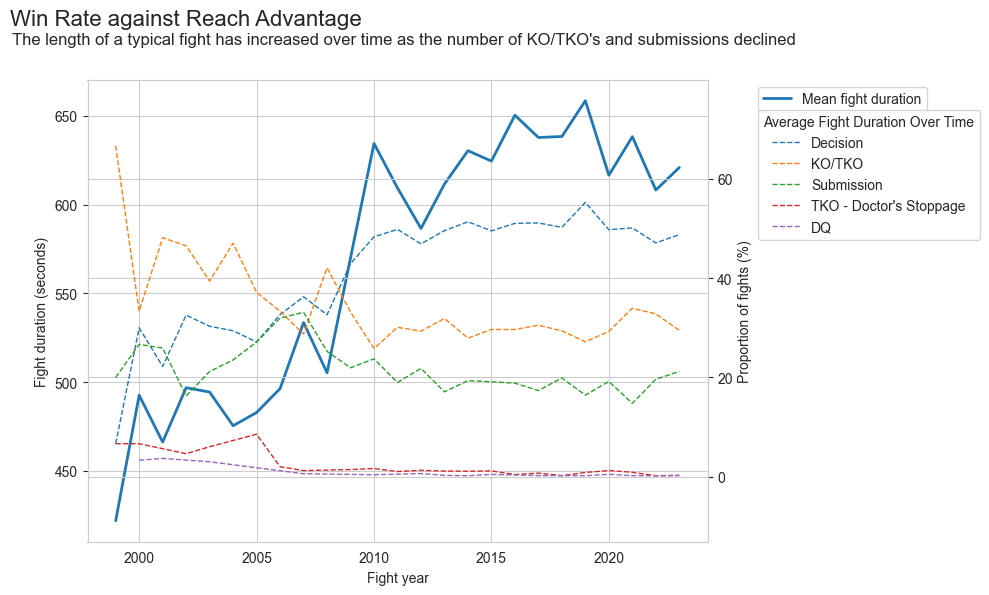

In [15]:
df = ufc_df.query('num_rounds == 3')

duration_df = df[['fight_duration_sec', 'num_rounds']].copy()
duration_df['fight_year'] = df['fight_date'].dt.year
duration_df = duration_df.groupby(['fight_year', 'num_rounds'])['fight_duration_sec'].mean().reset_index()

result_df = df[['result', 'fight_id']].copy()
result_df['fight_year'] = df['fight_date'].dt.year
result_df = result_df.groupby(['fight_year', 'result']).count().reset_index()
result_df['total_fights_year'] = result_df.groupby('fight_year')['fight_id'].transform('sum')
result_df['pct_of_total_fights'] = ((result_df['fight_id'] / result_df['total_fights_year']) * 100)

# Average fight duration over time [3 Round fights]
fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(
    duration_df,
    x='fight_year',
    y='fight_duration_sec',
    # color='blue',
    errorbar=None,
    label='Mean fight duration',
    linewidth=2,
    ax=ax
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.07, 1))

ax1=ax.twinx()

sns.lineplot(
    result_df,
    x='fight_year',
    y='pct_of_total_fights',
    hue='result',
    errorbar=None,
    linewidth=1,
    linestyle='--',
    # palette='pastel',
    ax=ax1
)

ax1.legend(title='Average Fight Duration Over Time')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1.07, 0.95))

ax.set(xlabel="Fight year", ylabel="Fight duration (seconds)")
ax1.set(ylabel="Proportion of fights (%)")

plt.title(
    "Win Rate against Reach Advantage",
    x=-0.125,
    y=1.1,
    ha="left",
    fontsize=16,
)
plt.suptitle(
    "The length of a typical fight has increased over time as the number of KO/TKO's and submissions declined",
    y=0.96,
    x=0.03,
    ha="left",
    wrap=True,
)

plt.margins(x=0.15, y=0.2)
